<a href="https://colab.research.google.com/github/WhiskeyMaDawg/SC1015_DataScience_Project/blob/main/Data_Preparation_%26_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preparation and Cleaning**  

## **Explanatory Note on Features**

Description of the dataset is as follows.

 **track_id** : Song unique ID 

 **track_name** : Song Name    

 **track_artist** : Song Artist  

 **artist_popularity** : Popularity of an artist  

 **popularity** : Song Popularity (0-100) where higher is better

 **track_album_id** : Album unique ID 

 **track_album_name** : Song album name     

 **danceability** : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.  

**energy** : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.  

**loudness** : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.  

**speechiness** : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.  

**acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 

**instrumentalness** : Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.  

**liveness** : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 

**valence** :	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).  

**tempo** :	The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.  



# **Import Data and Libaries** 


In [75]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from google.colab import files
import io
sb.set() # set the default Seaborn style for graphics

In [76]:
from google.colab import drive 
drive.mount('/content/gdrive')
songdf = pd.read_csv('gdrive/My Drive/SC1015 Project/SpotifyFinalAPI.csv') # this address different from everyone, check where you save the dataset and change the address accordingly, alternatively, can just save the dataset in 'My Drive'
songdf.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,track_id,track_name_x,popularity,track_uri,artist_name,artist_popularity,artist_genres,album,track_name_y,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,89,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),Shape of You,0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,95,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,Blinding Lights,0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,68,spotify:track:1rgnBhdG2JDFTbYkYRZAku,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,Dance Monkey,0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),88,spotify:track:0e7ipj03S05BNilyu5bRzt,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,rockstar (feat. 21 Savage),0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,90,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,Someone You Loved,0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100


In [77]:
songdf_original = songdf
songdf_original.head()

,track_id,track_name_x,popularity,track_uri,artist_name,artist_popularity,artist_genres,album,track_name_y,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,89,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),Shape of You,0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,95,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,Blinding Lights,0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,68,spotify:track:1rgnBhdG2JDFTbYkYRZAku,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,Dance Monkey,0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),88,spotify:track:0e7ipj03S05BNilyu5bRzt,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,rockstar (feat. 21 Savage),0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,90,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,Someone You Loved,0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100


## **Summary of Data**
There are a total of 791 data points, with no null values. 

In [78]:
songdf_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           791 non-null    object 
 1   track_name_x       791 non-null    object 
 2   popularity         791 non-null    int64  
 3   track_uri          791 non-null    object 
 4   artist_name        791 non-null    object 
 5   artist_popularity  791 non-null    int64  
 6   artist_genres      791 non-null    object 
 7   album              791 non-null    object 
 8   track_name_y       791 non-null    object 
 9   danceability       791 non-null    float64
 10  energy             791 non-null    float64
 11  tempo              791 non-null    float64
 12  loudness           791 non-null    float64
 13  valence            791 non-null    float64
 14  speechiness        791 non-null    float64
 15  instrumentalness   791 non-null    float64
 16  liveness           791 non

## **Check for duplicate values**
There are no duplicate values as all track_id are unique

In [79]:
counts = songdf_original['track_id'].unique()
print(len(counts))

791


In [80]:
# checking the size of the dataframe
print("Data dimensions : ", songdf.shape)
print(songdf.dtypes)

Data dimensions :  (791, 18)
track_id              object
track_name_x          object
popularity             int64
track_uri             object
artist_name           object
artist_popularity      int64
artist_genres         object
album                 object
track_name_y          object
danceability         float64
energy               float64
tempo                float64
loudness             float64
valence              float64
speechiness          float64
instrumentalness     float64
liveness             float64
acousticness         float64
dtype: object


In [81]:
#remove irrelevant columns
songdf = songdf.drop(columns = ["track_uri", "track_name_y","album","track_id"],axis = 1)
songdf.head()


,track_name_x,popularity,artist_name,artist_popularity,artist_genres,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
0,Shape of You,89,Ed Sheeran,96,"['pop', 'uk pop']",0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100
1,Blinding Lights,95,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146
2,Dance Monkey,68,Tones And I,78,"['australian pop', 'pop']",0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800
3,rockstar (feat. 21 Savage),88,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400
4,Someone You Loved,90,Lewis Capaldi,82,"['pop', 'uk pop']",0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100


In [82]:
#shift popularity to the back for better viewing
tp = songdf.pop("popularity")
songdf["popularity"] = tp
songdf.head(5)

,track_name_x,artist_name,artist_popularity,artist_genres,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness,popularity
0,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100,89
1,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146,95
2,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800,68
3,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400,88
4,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100,90


In [83]:
# Renaming the column names
songdf = songdf.rename(columns={"track_name_x":"title", "artist_name": "artist"})
songdf.head()

,title,artist,artist_popularity,artist_genres,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness,popularity
0,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100,89
1,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146,95
2,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800,68
3,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400,88
4,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100,90


# **Distinguish Categorical variables from Numeric Variables** 
In the data set, some categorical variables like speechiness and instrumentalness are encoded as numbers, and should not be interpreted as numerical variables. 

### **Speechiness**
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

In [84]:
# convert the speechiness column into categorical
speechiness_cat = pd.cut(songdf.speechiness,bins=[0,0.33,0.66,1.0],labels=['Words','Mix','Music'])
songdf.insert(8,'speech', speechiness_cat)    
songdf.head()

,title,artist,artist_popularity,artist_genres,danceability,energy,tempo,loudness,speech,valence,speechiness,instrumentalness,liveness,acousticness,popularity
0,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",0.825,0.652,95.977,-3.183,Words,0.931,0.0802,0.000000,0.0931,0.58100,89
1,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",0.514,0.730,171.005,-5.934,Words,0.334,0.0598,0.000095,0.0897,0.00146,95
2,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",0.826,0.593,98.083,-6.401,Words,0.541,0.0976,0.000161,0.1700,0.68800,68
3,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",0.585,0.520,159.801,-6.136,Words,0.129,0.0712,0.000070,0.1310,0.12400,88
4,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",0.501,0.405,109.891,-5.679,Words,0.446,0.0319,0.000000,0.1050,0.75100,90


In [85]:
songdf.drop(columns=["speechiness"], axis=1, inplace=True)

In [86]:
# rename the speech column to speechiness again
songdf = songdf.rename(columns={"speech":"speechiness"})
songdf.head(5)

,title,artist,artist_popularity,artist_genres,danceability,energy,tempo,loudness,speechiness,valence,instrumentalness,liveness,acousticness,popularity
0,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",0.825,0.652,95.977,-3.183,Words,0.931,0.000000,0.0931,0.58100,89
1,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",0.514,0.730,171.005,-5.934,Words,0.334,0.000095,0.0897,0.00146,95
2,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",0.826,0.593,98.083,-6.401,Words,0.541,0.000161,0.1700,0.68800,68
3,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",0.585,0.520,159.801,-6.136,Words,0.129,0.000070,0.1310,0.12400,88
4,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",0.501,0.405,109.891,-5.679,Words,0.446,0.000000,0.1050,0.75100,90


### **Instrumentalness**
Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0

In [87]:
bins =[-np.inf,0.5,1]
instrumentalness_cat = pd.cut(songdf.instrumentalness,bins,
                              labels=['Vocal', 'No Vocals'])
songdf.insert(11,'instrumental', instrumentalness_cat)


songdf.head(5)

,title,artist,artist_popularity,artist_genres,danceability,energy,tempo,loudness,speechiness,valence,instrumentalness,instrumental,liveness,acousticness,popularity
0,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",0.825,0.652,95.977,-3.183,Words,0.931,0.000000,Vocal,0.0931,0.58100,89
1,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",0.514,0.730,171.005,-5.934,Words,0.334,0.000095,Vocal,0.0897,0.00146,95
2,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",0.826,0.593,98.083,-6.401,Words,0.541,0.000161,Vocal,0.1700,0.68800,68
3,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",0.585,0.520,159.801,-6.136,Words,0.129,0.000070,Vocal,0.1310,0.12400,88
4,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",0.501,0.405,109.891,-5.679,Words,0.446,0.000000,Vocal,0.1050,0.75100,90


In [88]:
songdf.drop(columns=["instrumentalness"], axis=1, inplace=True)
songdf.head(5)

,title,artist,artist_popularity,artist_genres,danceability,energy,tempo,loudness,speechiness,valence,instrumental,liveness,acousticness,popularity
0,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",0.825,0.652,95.977,-3.183,Words,0.931,Vocal,0.0931,0.58100,89
1,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",0.514,0.730,171.005,-5.934,Words,0.334,Vocal,0.0897,0.00146,95
2,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",0.826,0.593,98.083,-6.401,Words,0.541,Vocal,0.1700,0.68800,68
3,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",0.585,0.520,159.801,-6.136,Words,0.129,Vocal,0.1310,0.12400,88
4,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",0.501,0.405,109.891,-5.679,Words,0.446,Vocal,0.1050,0.75100,90


### **Liveness**  
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 

In [89]:
bins =[-np.inf,0.8,1]
live_performance = pd.cut(songdf.liveness,bins,labels=['No', 'Yes'])
songdf.insert(13,'live_performance', live_performance)
songdf.head(5)

,title,artist,artist_popularity,artist_genres,danceability,energy,tempo,loudness,speechiness,valence,instrumental,liveness,acousticness,live_performance,popularity
0,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",0.825,0.652,95.977,-3.183,Words,0.931,Vocal,0.0931,0.58100,No,89
1,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",0.514,0.730,171.005,-5.934,Words,0.334,Vocal,0.0897,0.00146,No,95
2,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",0.826,0.593,98.083,-6.401,Words,0.541,Vocal,0.1700,0.68800,No,68
3,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",0.585,0.520,159.801,-6.136,Words,0.129,Vocal,0.1310,0.12400,No,88
4,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",0.501,0.405,109.891,-5.679,Words,0.446,Vocal,0.1050,0.75100,No,90


In [90]:
songdf.drop(columns=["liveness"], axis=1, inplace=True)

In [91]:
# checking the size of the dataframe
print("Data dimensions : ", songdf.shape)
print(songdf.dtypes)

Data dimensions :  (791, 14)
title                  object
artist                 object
artist_popularity       int64
artist_genres          object
danceability          float64
energy                float64
tempo                 float64
loudness              float64
speechiness          category
valence               float64
instrumental         category
acousticness          float64
live_performance     category
popularity              int64
dtype: object


# **Copy of original dataframe**



In [92]:
# Create a duplicate back up dataframe just in case the original dataframe mess up
song2df = songdf
song2df.head()

,title,artist,artist_popularity,artist_genres,danceability,energy,tempo,loudness,speechiness,valence,instrumental,acousticness,live_performance,popularity
0,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",0.825,0.652,95.977,-3.183,Words,0.931,Vocal,0.58100,No,89
1,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",0.514,0.730,171.005,-5.934,Words,0.334,Vocal,0.00146,No,95
2,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",0.826,0.593,98.083,-6.401,Words,0.541,Vocal,0.68800,No,68
3,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",0.585,0.520,159.801,-6.136,Words,0.129,Vocal,0.12400,No,88
4,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",0.501,0.405,109.891,-5.679,Words,0.446,Vocal,0.75100,No,90


In [93]:
print("Data dimensions : ", song2df.shape)
print(song2df.dtypes)


Data dimensions :  (791, 14)
title                  object
artist                 object
artist_popularity       int64
artist_genres          object
danceability          float64
energy                float64
tempo                 float64
loudness              float64
speechiness          category
valence               float64
instrumental         category
acousticness          float64
live_performance     category
popularity              int64
dtype: object


# **Exploratory Data Analysis**


##**Visualisation: Radar Plot to compare features of top 50 songs vs rest of data set**
We can look at the mean values of the features for the top 50 most popular songs of the data set, as compared to the rest of the songs in the data set to get a sense of how the popular songs differ from the rest of the songs

In [94]:
#Sort the top 50 songs of the data set
top_50 = songdf_original.sort_values('popularity', ascending = False).head(50)
top_50.head()

,track_id,track_name_x,popularity,track_uri,artist_name,artist_popularity,artist_genres,album,track_name_y,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
750,6Uj1ctrBOjOas8xZXGqKk4,Woman,97,spotify:track:6Uj1ctrBOjOas8xZXGqKk4,Doja Cat,94,"['dance pop', 'pop']",Planet Her,Woman,0.824,0.764,107.998,-4.175,0.881,0.0854,0.002940,0.1170,0.0888
95,4ZtFanR9U6ndgddUvNcjcG,good 4 u,96,spotify:track:4ZtFanR9U6ndgddUvNcjcG,Olivia Rodrigo,91,['pop'],SOUR,good 4 u,0.563,0.664,166.928,-5.044,0.688,0.1540,0.000000,0.0849,0.3350
86,02MWAaffLxlfxAUY7c5dvx,Heat Waves,96,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,87,"['gauze pop', 'indietronica', 'shiver pop']",Dreamland (+ Bonus Levels),Heat Waves,0.761,0.525,80.870,-6.900,0.531,0.0944,0.000007,0.0921,0.4400
715,3rmo8F54jFF8OgYsqTxm5d,Bad Habits,96,spotify:track:3rmo8F54jFF8OgYsqTxm5d,Ed Sheeran,96,"['pop', 'uk pop']",=,Bad Habits,0.807,0.893,126.011,-3.745,0.537,0.0347,0.000028,0.3660,0.0451
768,50nfwKoDiSYg8zOCREWAm5,Shivers,96,spotify:track:50nfwKoDiSYg8zOCREWAm5,Ed Sheeran,96,"['pop', 'uk pop']",=,Shivers,0.788,0.859,141.020,-2.724,0.822,0.0856,0.000000,0.0424,0.2810


In [95]:
#Drop popularity and artist_popularity column
new_top_50 = top_50.drop(['popularity','artist_popularity','loudness','tempo','track_id','track_name_y','track_name_x','track_uri','artist_name','artist_genres','album'],axis=1)
new_radar_plot = songdf_original.drop(['popularity','artist_popularity','loudness','tempo'], axis=1)


In [96]:
labels = list(new_top_50)[:]
features = new_top_50.mean().tolist()
features_all = new_radar_plot.mean().tolist()
labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



['danceability',
 'energy',
 'valence',
 'speechiness',
 'instrumentalness',
 'liveness',
 'acousticness']

In [97]:
import plotly.graph_objects as go

categories = ['danceability','energy',
            'valence','speechiness','instrumentalness','liveness','acousticness']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=features,
      theta=categories,
      fill='toself',
      name='Top 50'
))
fig.add_trace(go.Scatterpolar(
      r=features_all,
      theta=categories,
      fill='toself',
      name='All songs'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.7]
    )),
  showlegend=True
)

fig.show()

From the radar plot, it seems that the top 50 songs have higher accoustiness value as compared to the rest of the songs, while the rest of the data features seem similar. This could be because songs were taken from a single playlist that had songs with similar features

## **Visualisation: Exploring Artist Popularity**
Visualise top 10 artists with the highest average song popularity score


In [98]:
artist_popularitydf = songdf_original
# groupby aritst and estimate the mean of artist's songs
artist_songs=artist_popularitydf.groupby(['artist_name'])['popularity'].mean().to_frame()
top10_artistsongs = artist_songs.sort_values('popularity', ascending = False).head(10)

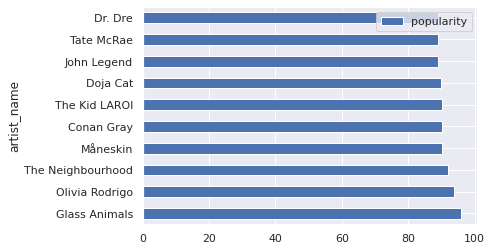

In [99]:
top10_artistsongs.plot(kind="barh",color='b')

We found that, glass animals and olivia rodrigo, the recent grammy winner, produced the most popular songs, on average. 


## **Visualisation: Most Common Genres**

In [100]:
song2df['artist_genres'] = song2df['artist_genres'].str.replace('[', '')
song2df['artist_genres'] = song2df['artist_genres'].str.replace(']', '')
song2df['artist_genres'] = song2df['artist_genres'].str.replace("'", '')
song2df['artist_genres'] = song2df['artist_genres'].str.replace(", ", ',')
song2df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,title,artist,artist_popularity,artist_genres,danceability,energy,tempo,loudness,speechiness,valence,instrumental,acousticness,live_performance,popularity
0,Shape of You,Ed Sheeran,96,"pop,uk pop",0.825,0.652,95.977,-3.183,Words,0.931,Vocal,0.58100,No,89
1,Blinding Lights,The Weeknd,97,"canadian contemporary r&b,canadian pop,pop",0.514,0.730,171.005,-5.934,Words,0.334,Vocal,0.00146,No,95
2,Dance Monkey,Tones And I,78,"australian pop,pop",0.826,0.593,98.083,-6.401,Words,0.541,Vocal,0.68800,No,68
3,rockstar (feat. 21 Savage),Post Malone,91,"dfw rap,melodic rap,rap",0.585,0.520,159.801,-6.136,Words,0.129,Vocal,0.12400,No,88
4,Someone You Loved,Lewis Capaldi,82,"pop,uk pop",0.501,0.405,109.891,-5.679,Words,0.446,Vocal,0.75100,No,90


In [101]:
from collections import Counter
genre_names = ",".join(songdf['artist_genres'].tolist()).split(" ")
column_names = ["word","count"]
most_common_words_in_genres_df = pd.DataFrame([dict(zip(column_names,word_count)) for word_count in Counter(genre_names).most_common(30)])

In [102]:
pip install wordcloud

(-0.5, 2799.5, 1023.5, -0.5)

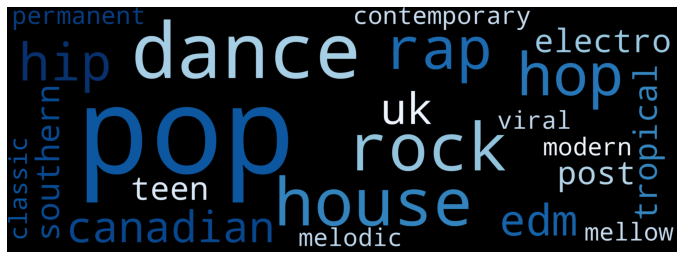

In [103]:
",".join(most_common_words_in_genres_df["word"].tolist())
from wordcloud import WordCloud
plt.figure(figsize=(12,8))
wrdcloud=WordCloud(relative_scaling=0.5, colormap="Blues", width=2800, height=1024).generate(" ".join(most_common_words_in_genres_df["word"].tolist()))
plt.imshow(wrdcloud)
plt.axis("off")

As visualised from the word cloud, some of the most popular genres are pop, dance and rock.

## **Numerical Data Analysis**

### Create a new data frame to process numerical data

In [104]:
songNumData = pd.DataFrame(songdf[['danceability', 'energy', 'loudness', 'acousticness', 'valence','tempo', 'popularity']])
songNumData

,danceability,energy,loudness,acousticness,valence,tempo,popularity
0,0.825,0.652,-3.183,0.58100,0.931,95.977,89
1,0.514,0.730,-5.934,0.00146,0.334,171.005,95
2,0.826,0.593,-6.401,0.68800,0.541,98.083,68
3,0.585,0.520,-6.136,0.12400,0.129,159.801,88
4,0.501,0.405,-5.679,0.75100,0.446,109.891,90
...,...,...,...,...,...,...,...
786,0.790,0.647,-5.983,0.05150,0.654,87.999,87
787,0.851,0.551,-5.177,0.15100,0.807,131.922,76
788,0.359,0.543,-7.582,0.49200,0.453,68.534,87
789,0.471,0.924,-3.906,0.00301,0.725,154.961,85


## **Check out summary statistics**

In [105]:
songNumData.describe()

,danceability,energy,loudness,acousticness,valence,tempo,popularity
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,0.664961,0.648631,-6.245063,0.203684,0.496515,119.201456,72.091024
std,0.140562,0.172123,2.342916,0.234137,0.226602,26.232928,24.627284
min,0.209000,0.111000,-18.435000,0.000025,0.059200,64.934000,0.000000
25%,0.582500,0.537000,-7.358000,0.028900,0.330500,99.043500,74.000000
50%,0.677000,0.672000,-5.833000,0.110000,0.478000,117.993000,80.000000
75%,0.762500,0.783000,-4.723000,0.291500,0.669500,135.063500,85.000000
max,0.967000,0.988000,-1.190000,0.978000,0.979000,205.846000,97.000000


## **Check out distributions: Boxplot, Histogram, Violin plot of numerical data**

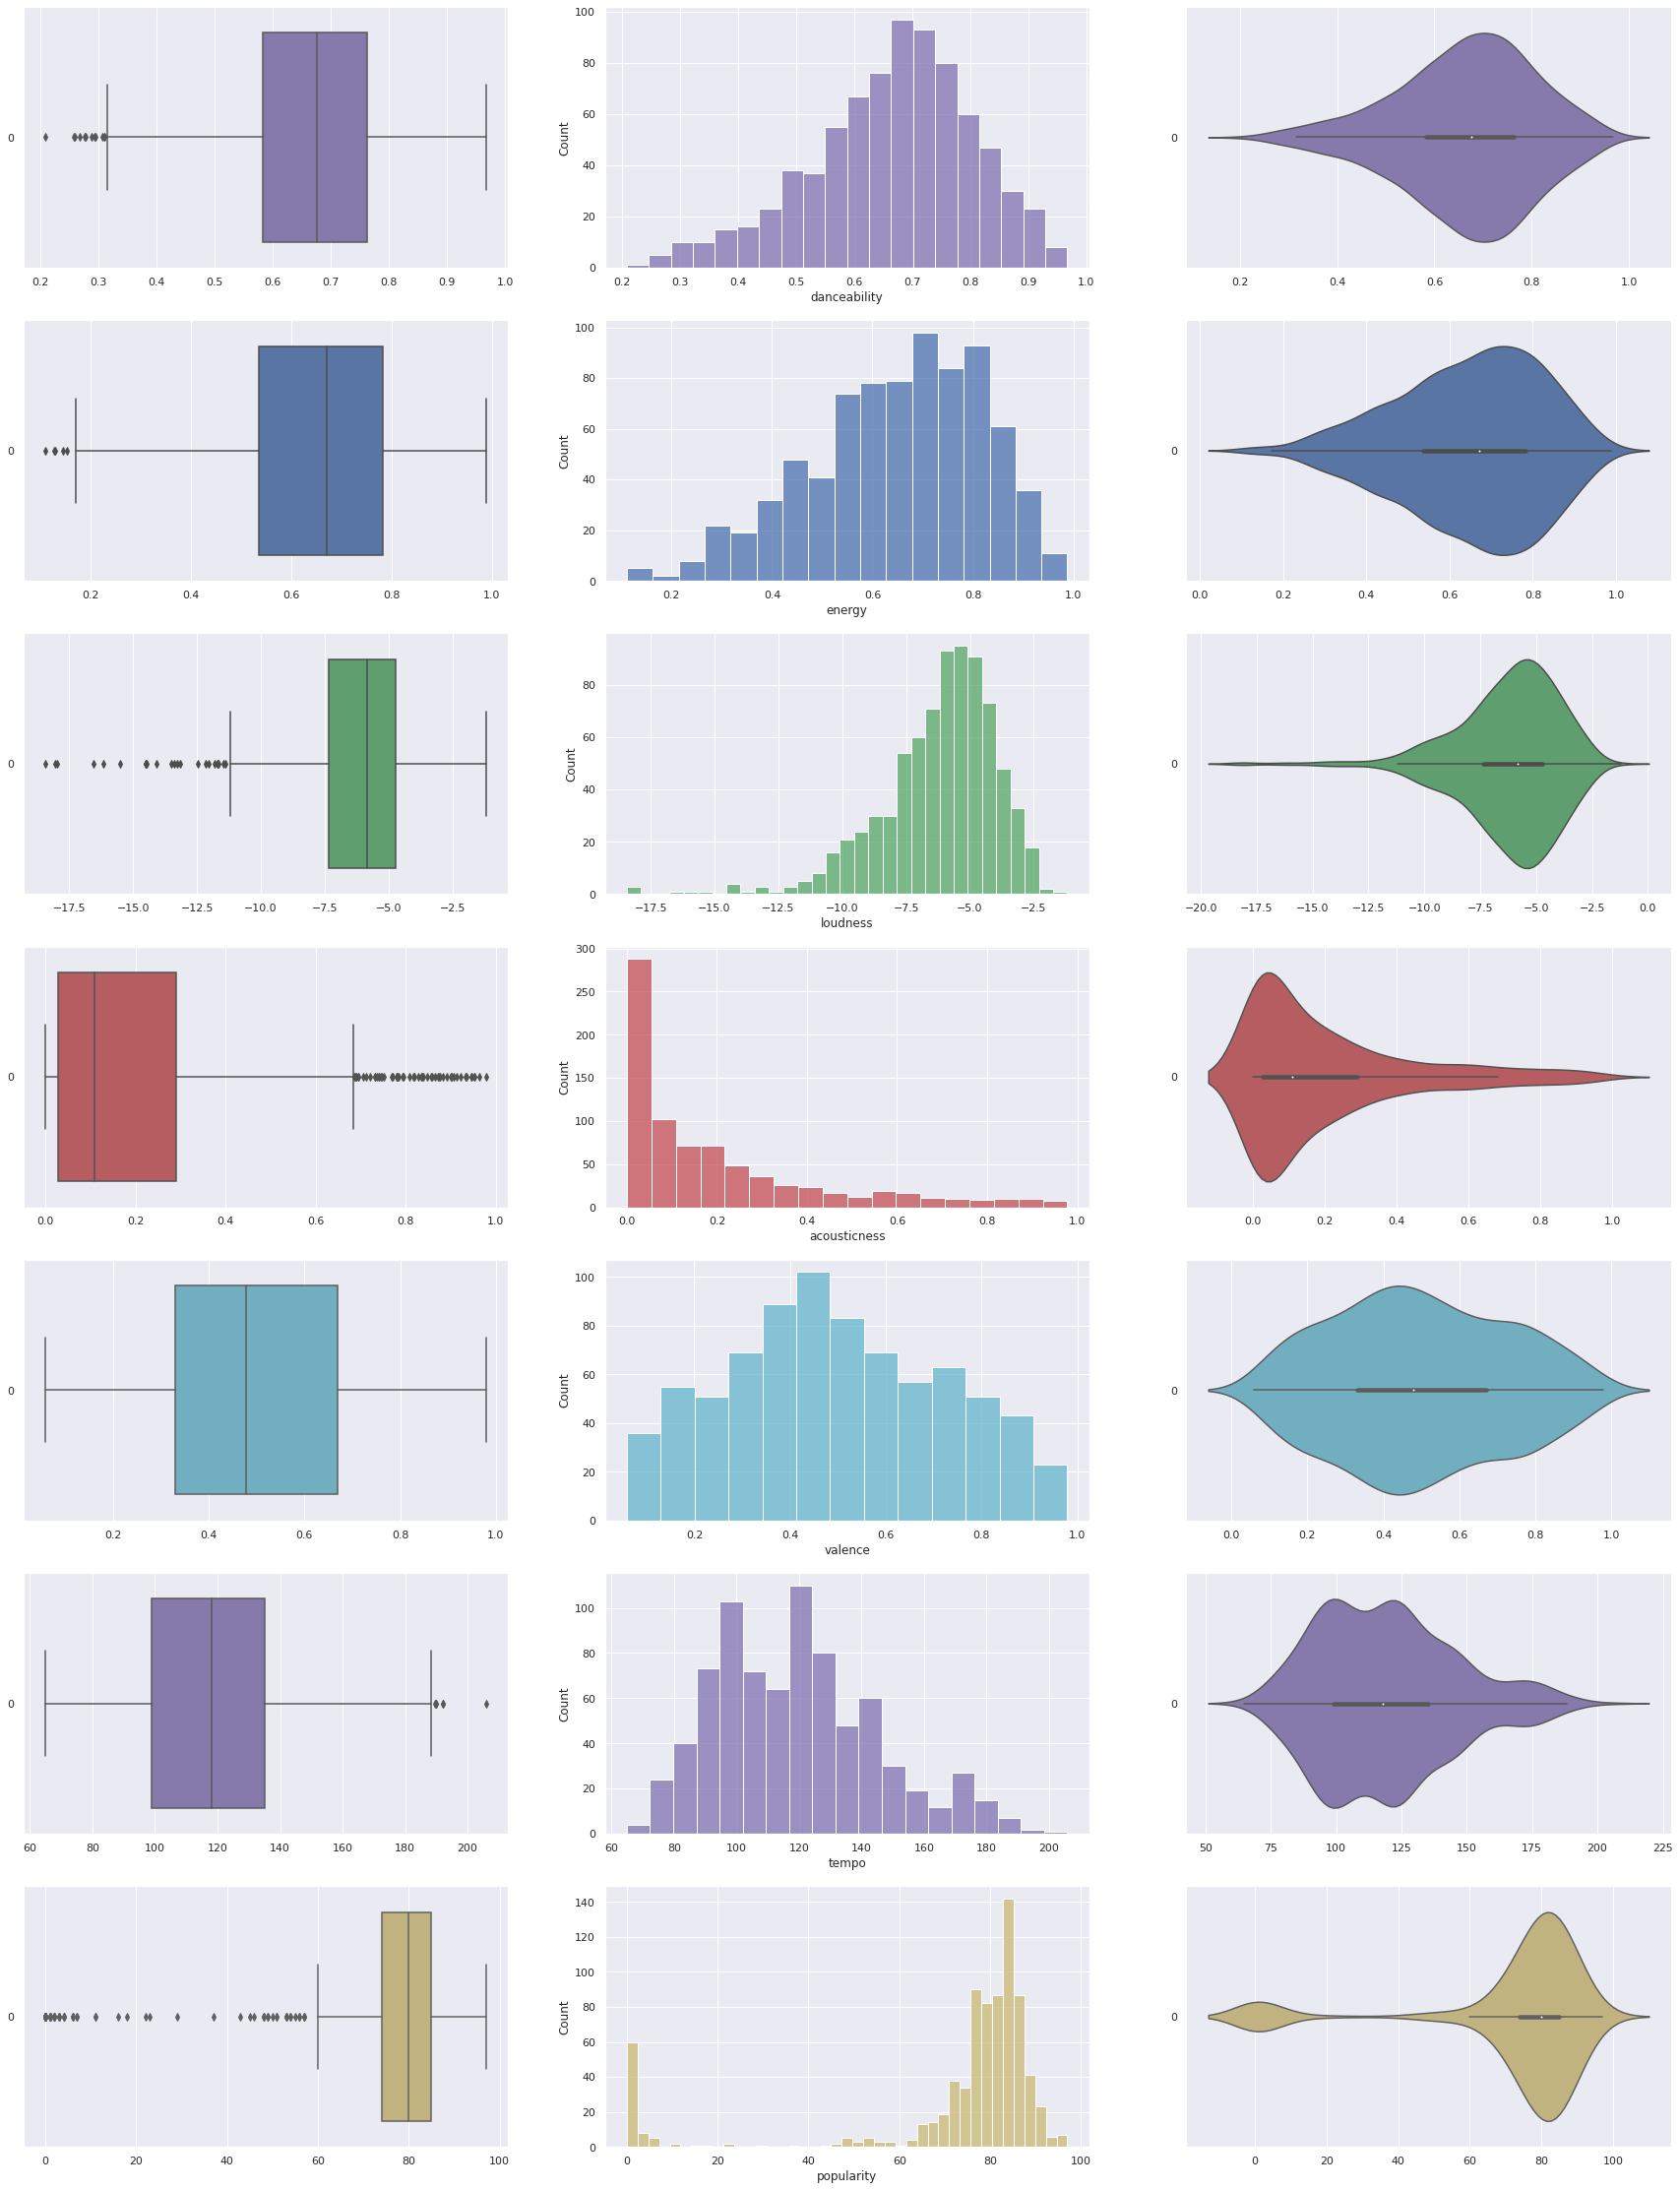

In [106]:
f, axes = plt.subplots(7, 3, figsize=(30, 40))
colours = ['m', 'b', 'g', 'r','c','m','y','b']

count = 0
for var in songNumData:
    sb.boxplot(data = songNumData[var], orient = "h", ax = axes[count,0], color=colours[count])
    sb.histplot(data = songNumData[var], ax = axes[count,1], color=colours[count])
    sb.violinplot(data = songNumData[var], orient = "h", ax = axes[count,2], color=colours[count])
    count += 1

We see that there is an abnormally large amount of data in the "Popularity" as 0, which it should not be the case since we extracted the music data from "Spotify's Most Played All-Time" playlist. 

On analysis, numerous popular songs like 'demons' by imagine dragons and 'mirrors' had 0 popularity, which we think is highly unlikely.



## **Remove Outliers: Popularity**

 The distribution of values in the sample of popularity seems Gaussian-like, so we used the IQR method of the sample as a cut-off for identifying and removing outliers.

In [107]:
#Calculate skewneess before removal of outliers
print(songNumData['popularity'].skew())

-2.2423828549527403


In [108]:
songNumData.describe()

,danceability,energy,loudness,acousticness,valence,tempo,popularity
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,0.664961,0.648631,-6.245063,0.203684,0.496515,119.201456,72.091024
std,0.140562,0.172123,2.342916,0.234137,0.226602,26.232928,24.627284
min,0.209000,0.111000,-18.435000,0.000025,0.059200,64.934000,0.000000
25%,0.582500,0.537000,-7.358000,0.028900,0.330500,99.043500,74.000000
50%,0.677000,0.672000,-5.833000,0.110000,0.478000,117.993000,80.000000
75%,0.762500,0.783000,-4.723000,0.291500,0.669500,135.063500,85.000000
max,0.967000,0.988000,-1.190000,0.978000,0.979000,205.846000,97.000000


In [109]:
#Calculate Mean and IQR
mean_popularity = songNumData['popularity'].mean()
Q1 = songNumData['popularity'].quantile(0.25)
Q3 = songNumData['popularity'].quantile(0.75)
IQR = Q3 - Q1
print("Mean: ", mean_popularity)
print("IQR: ", IQR)

#Calculate outliers (if data<(Q1-1.5*IQR) or data>(Q3+1.5*IQR))
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
print("Upper bound: ", upper)
print("Lower bound:", lower)

Mean:  72.09102402022756
IQR:  11.0
Upper bound:  101.5
Lower bound: 57.5


## **Remove outliers according to the upper and lower bound**

In [110]:
# Rule to identify outliers
rule = ((songNumData['popularity'] < lower) | (songNumData['popularity']  >  upper))

# Count the number of outliers
print("Number of outliers in popularity:")
rule.sum()

Number of outliers in popularity:


103

In [111]:
# Indices or rows corresponding to outleirs
outlierindices = rule.index[rule == True]
outlierindices

Int64Index([  5,   6,   9,  15,  27,  39,  43,  45,  48,  51,
            ...
            475, 482, 544, 551, 567, 602, 609, 610, 678, 775],
           dtype='int64', length=103)

In [112]:
# Remove the outliers based on the row indices obtained above
songdf.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
songdf

,title,artist,artist_popularity,artist_genres,danceability,energy,tempo,loudness,speechiness,valence,instrumental,acousticness,live_performance,popularity
0,Shape of You,Ed Sheeran,96,"pop,uk pop",0.825,0.652,95.977,-3.183,Words,0.931,Vocal,0.58100,No,89
1,Blinding Lights,The Weeknd,97,"canadian contemporary r&b,canadian pop,pop",0.514,0.730,171.005,-5.934,Words,0.334,Vocal,0.00146,No,95
2,Dance Monkey,Tones And I,78,"australian pop,pop",0.826,0.593,98.083,-6.401,Words,0.541,Vocal,0.68800,No,68
3,rockstar (feat. 21 Savage),Post Malone,91,"dfw rap,melodic rap,rap",0.585,0.520,159.801,-6.136,Words,0.129,Vocal,0.12400,No,88
4,Someone You Loved,Lewis Capaldi,82,"pop,uk pop",0.501,0.405,109.891,-5.679,Words,0.446,Vocal,0.75100,No,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,Heartless,Kanye West,96,"chicago rap,rap",0.790,0.647,87.999,-5.983,Words,0.654,Vocal,0.05150,No,87
787,I'm Gonna Be (500 Miles),The Proclaimers,65,"celtic rock,scottish rock",0.851,0.551,131.922,-5.177,Words,0.807,Vocal,0.15100,No,76
788,Lover,Taylor Swift,98,pop,0.359,0.543,68.534,-7.582,Words,0.453,Vocal,0.49200,No,87
789,Everybody Talks,Neon Trees,71,"modern alternative rock,modern rock,pop rock,rock",0.471,0.924,154.961,-3.906,Words,0.725,Vocal,0.00301,No,85


In [113]:
# Reindex the column since some rows are missing
songdf = songdf.reset_index(drop=True)
songdf

,title,artist,artist_popularity,artist_genres,danceability,energy,tempo,loudness,speechiness,valence,instrumental,acousticness,live_performance,popularity
0,Shape of You,Ed Sheeran,96,"pop,uk pop",0.825,0.652,95.977,-3.183,Words,0.931,Vocal,0.58100,No,89
1,Blinding Lights,The Weeknd,97,"canadian contemporary r&b,canadian pop,pop",0.514,0.730,171.005,-5.934,Words,0.334,Vocal,0.00146,No,95
2,Dance Monkey,Tones And I,78,"australian pop,pop",0.826,0.593,98.083,-6.401,Words,0.541,Vocal,0.68800,No,68
3,rockstar (feat. 21 Savage),Post Malone,91,"dfw rap,melodic rap,rap",0.585,0.520,159.801,-6.136,Words,0.129,Vocal,0.12400,No,88
4,Someone You Loved,Lewis Capaldi,82,"pop,uk pop",0.501,0.405,109.891,-5.679,Words,0.446,Vocal,0.75100,No,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,Heartless,Kanye West,96,"chicago rap,rap",0.790,0.647,87.999,-5.983,Words,0.654,Vocal,0.05150,No,87
684,I'm Gonna Be (500 Miles),The Proclaimers,65,"celtic rock,scottish rock",0.851,0.551,131.922,-5.177,Words,0.807,Vocal,0.15100,No,76
685,Lover,Taylor Swift,98,pop,0.359,0.543,68.534,-7.582,Words,0.453,Vocal,0.49200,No,87
686,Everybody Talks,Neon Trees,71,"modern alternative rock,modern rock,pop rock,rock",0.471,0.924,154.961,-3.906,Words,0.725,Vocal,0.00301,No,85


In [114]:
#Calculate skewneess after removal of outliers
print(songdf['popularity'].skew())

-0.5261589157151929


As mentioned earlier, noting that ‘popularity’ resembles a gaussian distribution, we used the IQR method to remove outliers and obtained an improved skewness score of 0.52.

## **Visualise plot after removing outliers**


#### Boxplot, Histogram and Violin Plot

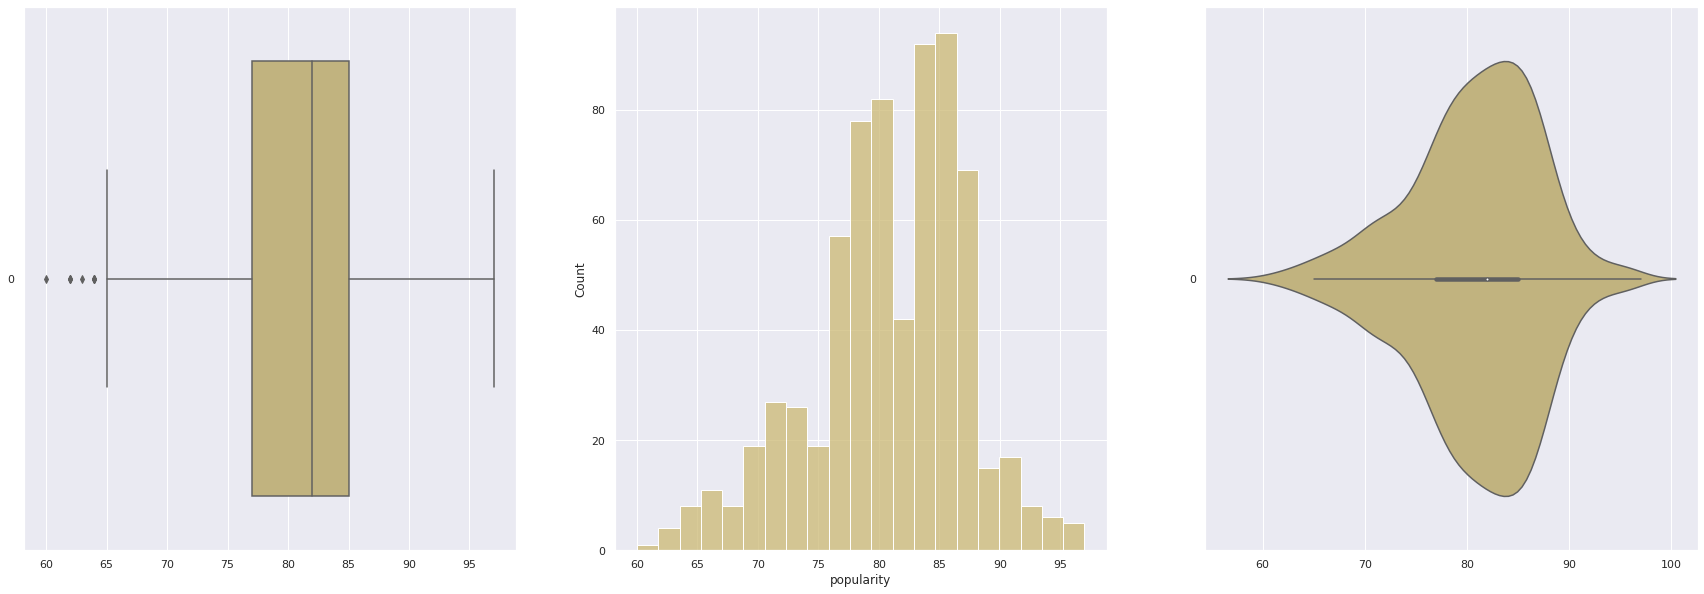

In [115]:
f, axes = plt.subplots(1, 3, figsize=(30, 10))
songNumData = pd.DataFrame(songdf[['danceability', 'energy', 'loudness', 'acousticness', 'valence','tempo','artist_popularity','popularity']])
sb.boxplot(data = songdf['popularity'], orient = "h", ax = axes[0], color='y')
sb.histplot(data = songdf['popularity'], ax = axes[1], color='y')
sb.violinplot(data = songdf['popularity'], orient = "h", ax = axes[2], color='y')

## **Correlation of the numberical data with popularity** 

In [116]:
songNumData.corr()

,danceability,energy,loudness,acousticness,valence,tempo,artist_popularity,popularity
danceability,1.000000,0.032801,0.124542,-0.141234,0.384417,-0.156909,0.076039,-0.009984
energy,0.032801,1.000000,0.721351,-0.620184,0.431632,0.064925,-0.045980,-0.065380
loudness,0.124542,0.721351,1.000000,-0.456077,0.305758,0.039621,0.054334,-0.053326
acousticness,-0.141234,-0.620184,-0.456077,1.000000,-0.246715,-0.079165,0.032895,0.077246
valence,0.384417,0.431632,0.305758,-0.246715,1.000000,-0.004835,-0.094777,-0.017594
tempo,-0.156909,0.064925,0.039621,-0.079165,-0.004835,1.000000,0.030232,0.068907
artist_popularity,0.076039,-0.045980,0.054334,0.032895,-0.094777,0.030232,1.000000,0.302006
popularity,-0.009984,-0.065380,-0.053326,0.077246,-0.017594,0.068907,0.302006,1.000000


## **Heatmap of the correlation matrix between numerical data**

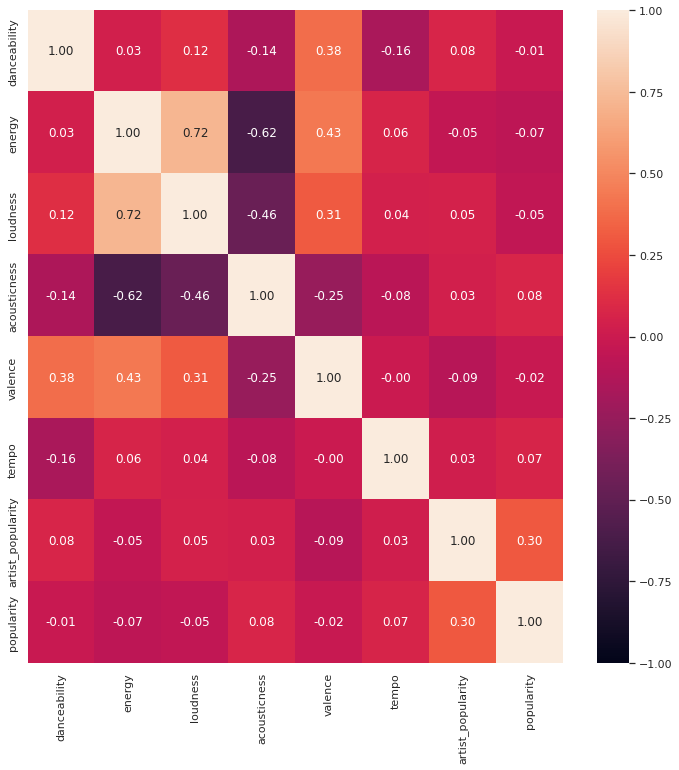

In [117]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(songNumData.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Among the different variables, artist popularity has the highest correlation of 0.3 with track popularity. We can see that the other variables are not really correlated with popularity as the correlation is quite low. A heatmap was subsequently used to visualise the correlation between variables. 

Therefore, in general, most features do not have a linear relationship with popularity, with a correlation score of less than 0.1.

## **Pairplot of the numeric variables**

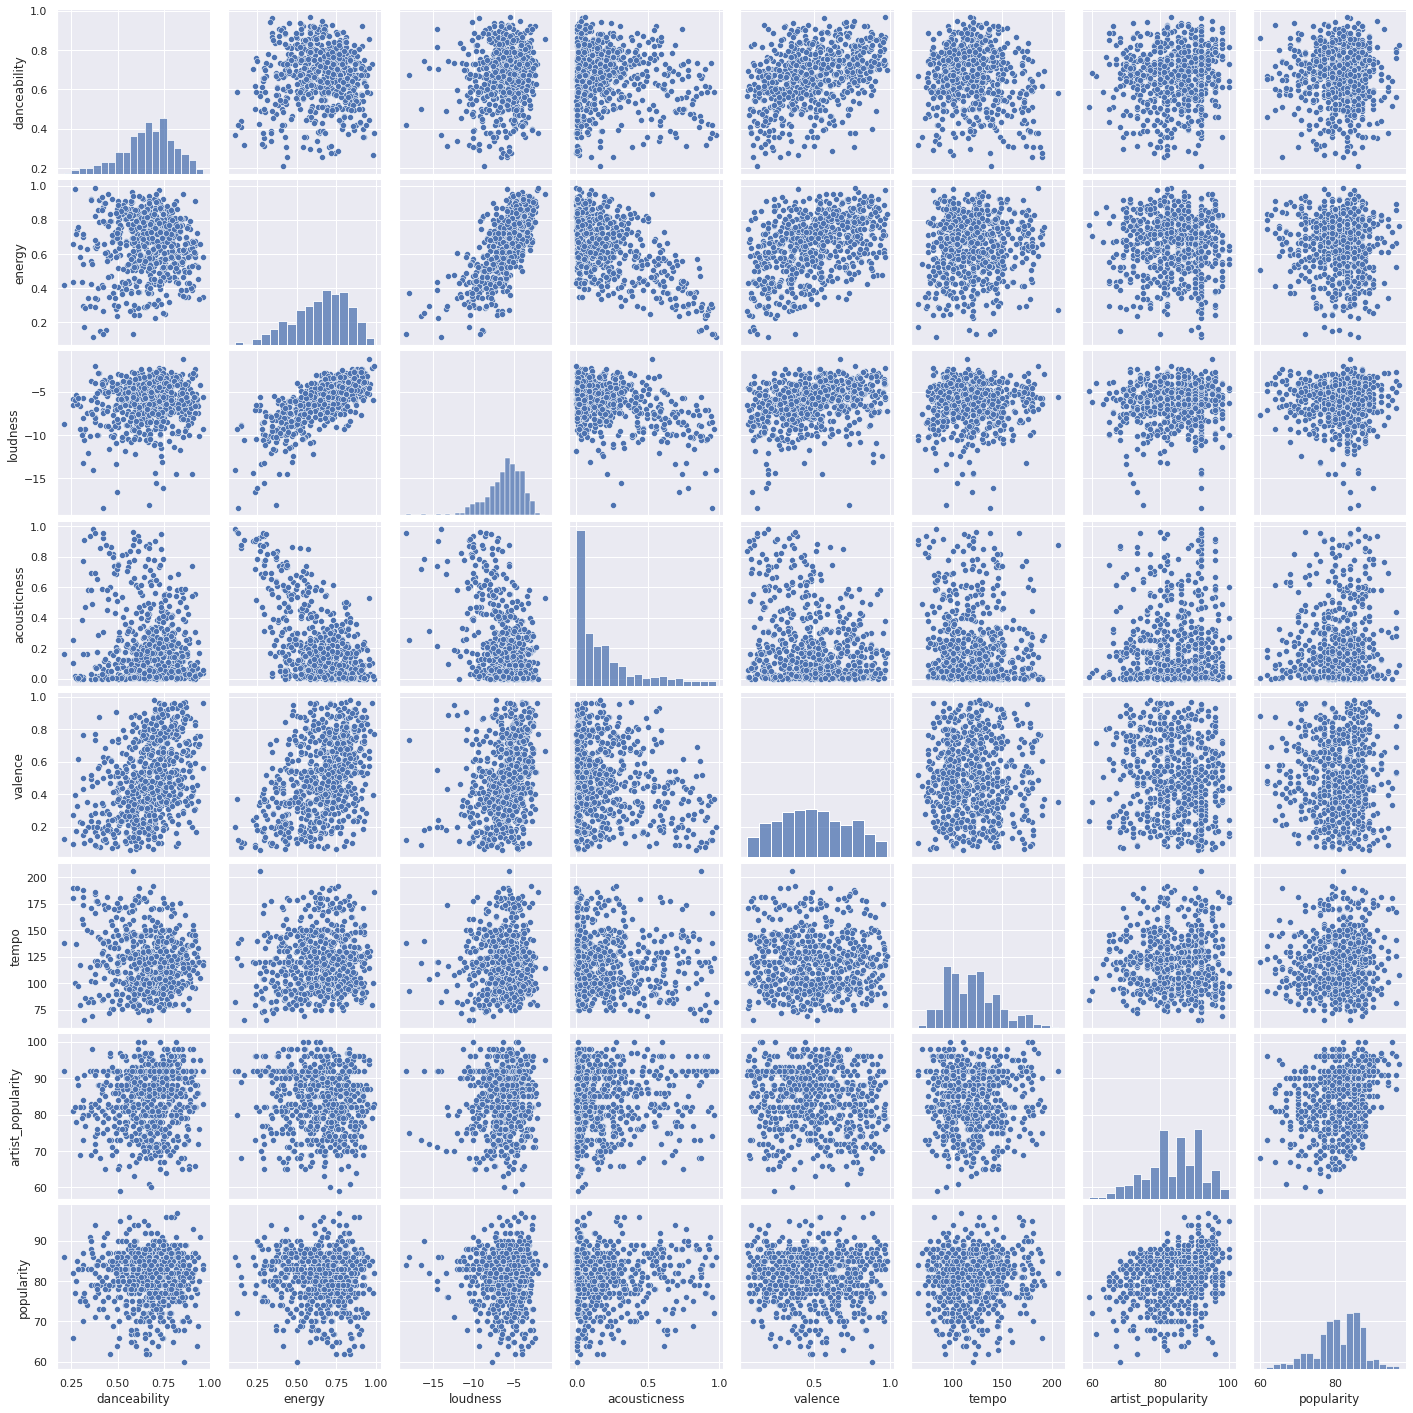

In [118]:
sb.pairplot(data = songNumData)

From the pairplot, we can also see that there is no strong linear relationship between the numeric variables and popularity, with the points largely scattered. This could be because a song is made out of a combination of various features and no one feature particularly stands out on its own in influencing a song's popularity

# **Categorical Data Analysis**

### Create new data frame to process categorical data
This data frame uses the dataframe with the outliers removed

In [119]:
songCatData = pd.DataFrame(songdf[['live_performance','speechiness', 'instrumental']])
songCatData = songCatData.astype('category')
songCatData.describe()

,live_performance,speechiness,instrumental
count,688,688,688
unique,1,2,2
top,No,Words,Vocal
freq,688,663,685


In [120]:
songCatData

,live_performance,speechiness,instrumental
0,No,Words,Vocal
1,No,Words,Vocal
2,No,Words,Vocal
3,No,Words,Vocal
4,No,Words,Vocal
...,...,...,...
683,No,Words,Vocal
684,No,Words,Vocal
685,No,Words,Vocal
686,No,Words,Vocal


## **Visualise counts across the levels of the four different categorical variables**




Words    663
Mix       25
Music      0
Name: speechiness, dtype: int64

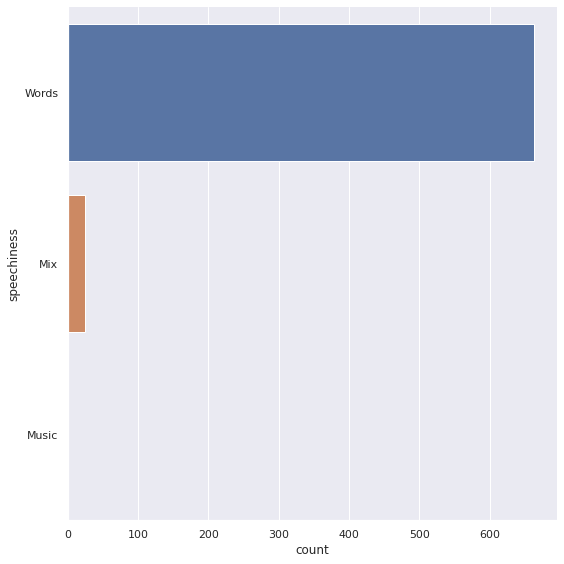

In [121]:
sb.catplot(y = 'speechiness', data = songCatData, kind = "count", height = 8)
songCatData["speechiness"].value_counts()

Most of the popular tracks are of speech type words. There is a potential class imbalance here which we should take note of when doing machine learning, with no songs falling under the music category and very little songs falling under the 'mix' category



Vocal        685
No Vocals      3
Name: instrumental, dtype: int64

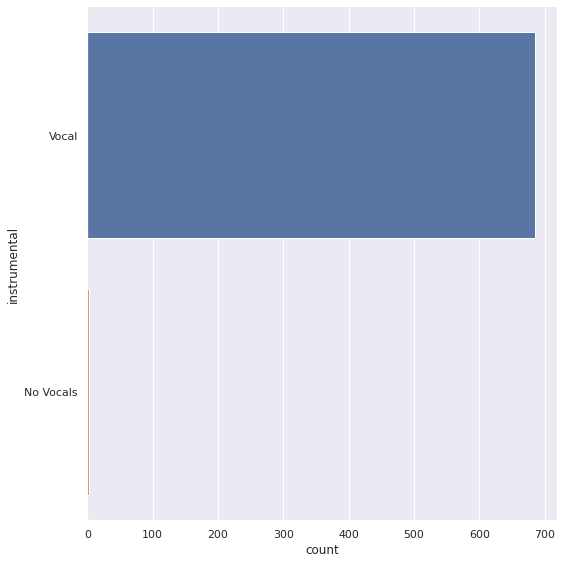

In [122]:
sb.catplot(y = 'instrumental', data = songCatData, kind = "count", height = 8)
songCatData["instrumental"].value_counts()

Almost all of popular tracks are of vocal type. Again, as mentioned earlier, the class imbalance should be noted as we proceed with machine learning



No     688
Yes      0
Name: live_performance, dtype: int64

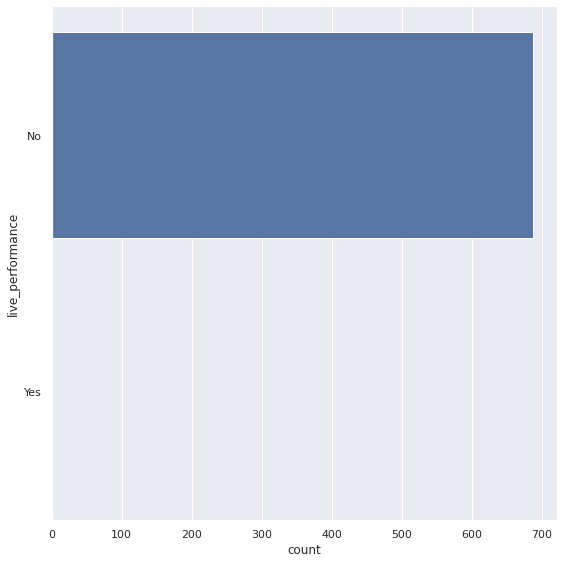

In [123]:
sb.catplot(y = 'live_performance', data = songCatData, kind = "count", height = 8)
songCatData["live_performance"].value_counts()

All of the popular tracks are not live performance

## **Visualise distribution of popularity with respect to the different categories**

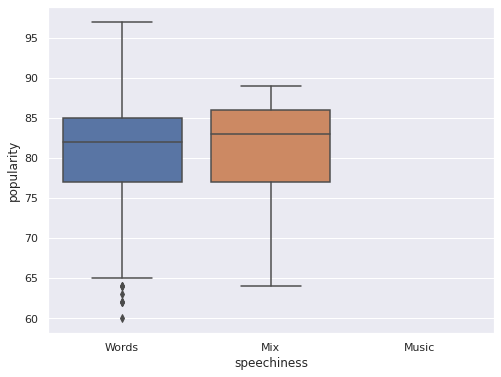

In [124]:
f = plt.figure(figsize=(8, 6))
sb.boxplot(data = songdf, y = "popularity", x = "speechiness")

The median popularity of tracks with speech type of music is about the same as Mix speech type, with songs with 'Mix' having a slightly higher popularity. However, in general, popularity does not vary significantly across the different categories.

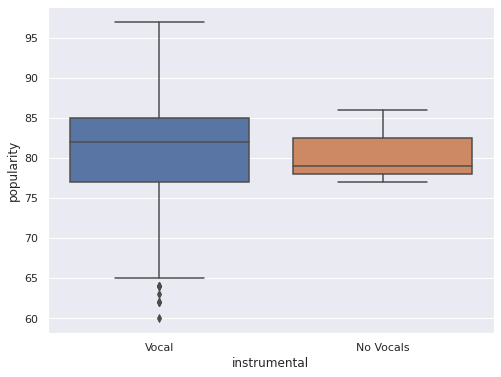

In [125]:
f = plt.figure(figsize=(8, 6))
sb.boxplot(data = songdf, y = "popularity", x = "instrumental")

The median popularity of Vocal tracks is higher than that of Non-vocal tracks. It can be seen that vocal tracks are generally more popular than non-vocal tracks. However, the comparison may not be that accurate, considering the few non-vocal data points as mentioned earlier.

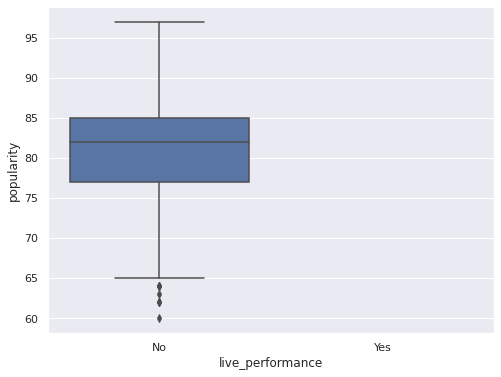

In [126]:
f = plt.figure(figsize=(8, 6))
sb.boxplot(data = songdf, y = "popularity", x = "live_performance")

We can see that all the popular songs in the playlists are not live performances, so no analysis can be made.